<a href="https://colab.research.google.com/github/ANGELA-NYUTU/hello-world/blob/master/Copy_of_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Domestic Animals

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the libraries
import numpy as np

from fastai.vision import * 
from fastai.metrics import error_rate, accuracy

In [ ]:
# create a list of domestic animals 
domestic = ["cats", "dogs", "cows", "horse", "chicken", "pigs"]

# create a folder to store the data
path = Path('data/')

# folder to store th images
folder = []

for i in domestic:
  # asssign destination
  dest = path/i
  # make  directory to images
  dest.mkdir(parents=True, exist_ok=True)
  # append to empty list
  folder.append(dest)

In [ ]:
# create an empty list to store the csv files
csv = []

for j in domestic:
  files = j + '.csv'
  csv.append(files)

In [ ]:
folder

[PosixPath('data/cats'),
 PosixPath('data/dogs'),
 PosixPath('data/cows'),
 PosixPath('data/horse'),
 PosixPath('data/chicken'),
 PosixPath('data/pigs')]

In [ ]:
csv

['cats.csv', 'dogs.csv', 'cows.csv', 'horse.csv', 'chicken.csv', 'pigs.csv']

In [ ]:
# download the images and store in created folder
c = 0

while c < len(csv):
  download_images(path/csv[c], folder[c], max_pics=100)
  c += 1

In [ ]:
# verify the classes
for k in domestic:
  print(k)
  verify_images(path/k, delete=True, max_size=500)

cats


dogs


cows


horse


chicken
pigs


In [ ]:
# Visuals the downloaded data
np.random.seed(42)

# load the data
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [ ]:
# view the classes
data.classes

['cats', 'cows', 'dogs', 'horse', 'pigs']

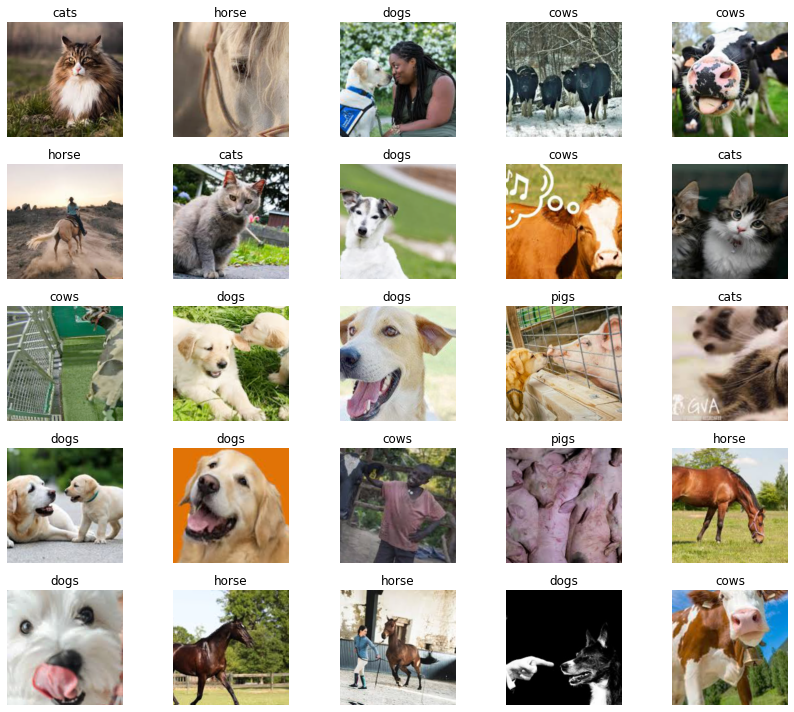

In [ ]:
# view the data
data.show_batch(5, figsize=(12,10))

In [ ]:
# create a model and training
learn = create_cnn(data, models.resnet50, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
defaults.device = torch.device('cuda') # use gpu
# train
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.992415,0.706904,0.789474,0.210526,00:12
1,1.254430,0.451702,0.912281,0.087719,00:06
2,0.910501,0.536731,0.921053,0.078947,00:06
3,0.709437,0.505743,0.912281,0.087719,00:06
4,0.596756,0.454513,0.912281,0.087719,00:06


In [ ]:
# model architecture

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
# unfreeze to train the whole network
learn.unfreeze()

In [ ]:
# find the perfect learning rate
learn.lr_find

<bound method lr_find of Learner(data=ImageDataBunch;

Train: LabelList (267 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cows,cows,cows,cows,cows
Path: data;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cats,dogs,cows,cows,cows
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

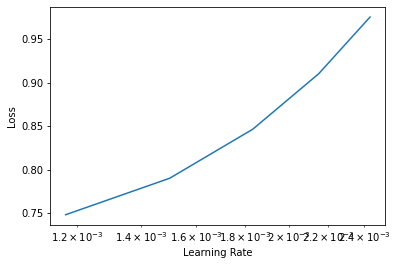

In [ ]:
# visulaize the learning rates
learn.recorder.plot()

# looking for the steepest downward slope


In [ ]:
# training using different learning rate
learn.fit_one_cycle(4, max_lr=slice(3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.120499,0.438376,0.912281,0.087719,00:09
1,0.127217,0.459198,0.912281,0.087719,00:07
2,0.111548,0.464620,0.912281,0.087719,00:08
3,0.090810,0.465103,0.903509,0.096491,00:08


In [ ]:
# save the model
learn.save("part1")

## Improve the model by cleaning the images

In [ ]:
# using the image cleaner
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds

LabelList (267 items)
x: ImageList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
cows,cows,cows,cows,cows
Path: data

In [ ]:
idxs

tensor([ 38, 243, 152, 249, 114, 158,  69,  77,  72, 139,  39, 147,  67,  47,
        117,  71,   6, 204, 261, 146,  21, 120, 167, 129, 157,  41, 153, 100,
         63,  95,  22,  70, 149,  43, 231, 131, 150, 251,  78, 244, 173,  40,
         24, 124,  49,  74,  18,  82, 246, 248,  17,  51,  13,  91,  46,  68,
        122, 264, 112, 162,  42, 151,  90, 174,   1,  34, 240,   2,  33,  86,
        245, 263, 255, 107,  92, 141, 155,  50,  14,  31,   8, 241,  36, 256,
        262, 128, 159,  52,  60, 135,  87,  61,  79,  99,   5,  94, 219,  45,
        165,  80,  55,  85, 130, 166, 229, 113, 127,  44, 103, 136, 221, 172,
          4,  23,  30,  66,  11,  54,  26, 189,   7,  97,  10, 214,  25,  58,
         16,  93,  27, 116, 266, 212, 259, 228,  15,  35, 123, 145,  48, 163,
        164,  84, 168, 109, 104,  32, 226, 156,  81,  57, 101,  29, 106,   0,
        143, 198, 170, 115,  53,  73, 254, 258, 224, 194,  56,  20, 252,  89,
         12,  28, 182, 234, 137, 176, 230, 211, 110, 125,   3,  

In [ ]:
# save cleaned as csv
df = pd.read_csv(path/'cleaned.csv', header='infer')
df.head()

,name,label
0,cows/00000036.jpg,cows
1,cows/00000000.jpg,cows
2,cows/00000023.jpg,cows
3,cows/00000005.jpg,cows
4,cows/00000074.jpg,cows


In [ ]:
db = (ImageList.from_df(df,path)
                    .random_split_by_pct(0.2)
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch(bs=8)).normalize(imagenet_stats)

In [ ]:
# difference after cleaning
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print(db.classes, db.c, len(db.train_ds), len(db.valid_ds))

['cats', 'cows', 'dogs', 'horse', 'pigs'] 5 267 114
['cats', 'cows', 'dogs', 'horse', 'pigs'] 5 214 53


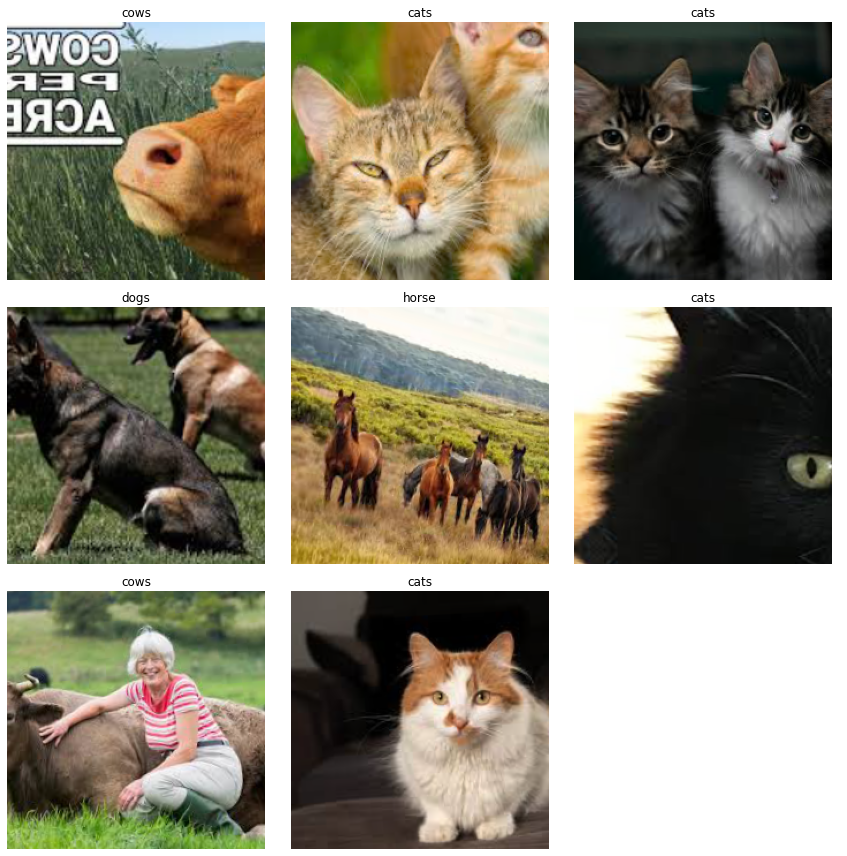

In [ ]:
# view a batch from db
db.show_batch()

In [ ]:
# load the saved model
learn.load("part1")

Learner(data=ImageDataBunch;

Train: LabelList (267 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cows,cows,cows,cows,cows
Path: data;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cats,dogs,cows,cows,cows
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(

In [ ]:
# replace the data
learn.data = db


In [ ]:
# freeze learn
learn.freeze()


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.492171,0.151858,0.981132,0.018868,00:08
1,0.800270,0.564372,0.867925,0.132075,00:05
2,0.764104,0.274854,0.886792,0.113208,00:05
3,0.620674,0.286521,0.886792,0.113208,00:05


In [ ]:
learn.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (214 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cows,cows,cows,cows,cows
Path: data;

Valid: LabelList (53 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pigs,cats,cows,cows,dogs
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [ ]:
learn.save("final")

## Evaluate

In [ ]:
# use classification interpretation
classifcation = ClassificationInterpretation.from_learner(learn)

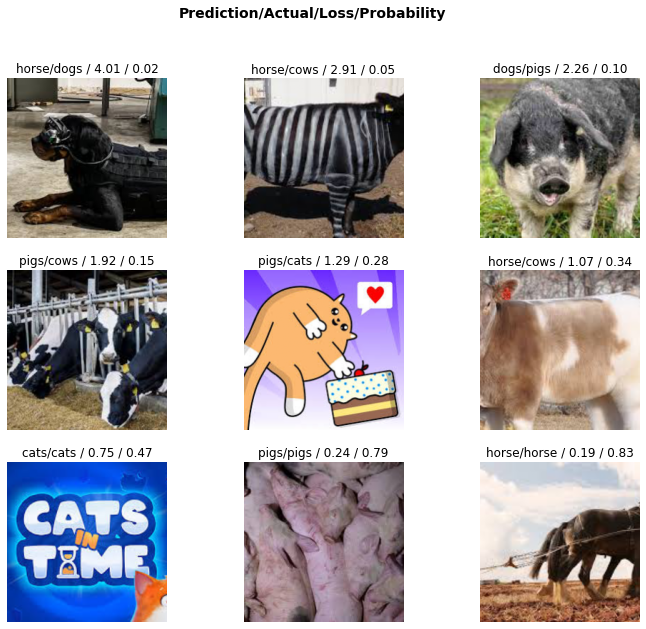

In [ ]:
# plot the top losses
classifcation.plot_top_losses(9, figsize=(12,10))

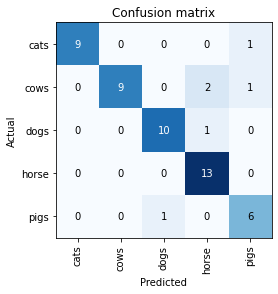

In [ ]:
# using confusion matrix
classifcation.plot_confusion_matrix()

In [ ]:
# export the model for deployment
learn.export('/content/model.pkl')